In [54]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
webpage = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')

In [56]:
# Use the .content of the webpage response to get all the HTML
soup = BeautifulSoup(webpage.content, 'html.parser')

In [66]:
# Get all the ratings from the website
ratings_tags = soup.find_all(attrs={'class': 'Rating'})

In [68]:
# Extract the text from the rating class tags (and skip the first one since it's a string)
ratings = [ float(rating.get_text()) for rating in ratings_tags[1:] ]
ratings[:10]

[3.75, 2.75, 3.0, 3.5, 3.5, 2.75, 3.5, 3.5, 3.75, 4.0]

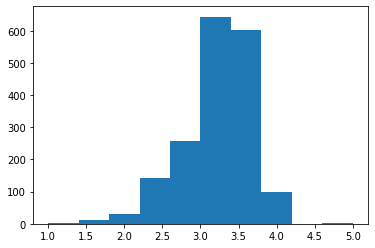

In [69]:
# Create histogram of the ratings
plt.hist(ratings)
plt.show()

In [70]:
# Finding all the companies
cs = soup.select('.Company')

# List comp to get all the company names from the website
companies = [ c.get_text() for c in cs[1:] ]
companies[:10]                       

['A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin',
 'A. Morin']

In [130]:
# Create a list of all the percentages of cacao
cacao_percentages = soup.select('.CocoaPercent')

# And convert all the values to floats
percentages = [ float(percent.get_text().strip('%')) for percent in cacao_percentages[1:] ]
percentages[:5]

[63.0, 70.0, 70.0, 70.0, 70.0]

In [80]:
# To create the data frame initialise a dictionary with the two lists: companies and ratings
# then pass the dictionary to the DataFrame constructor
d = {'Company': companies, 'Ratings': ratings}
chocolate_df = pd.DataFrame(d)

In [89]:
mean_values = chocolate_df.groupby('Company').Ratings.mean()

In [90]:
# Who are the top 10 companies according to their average rating?
mean_values.nlargest(10)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64

In [131]:
chocolate_df['CocoaPercentage'] = percentages

In [132]:
# A new column "CocoaPercentage" added to the data frame
chocolate_df.head()

,Company,Ratings,CocoaPercentage
0,A. Morin,3.75,63.0
1,A. Morin,2.75,70.0
2,A. Morin,3.00,70.0
3,A. Morin,3.50,70.0
4,A. Morin,3.50,70.0


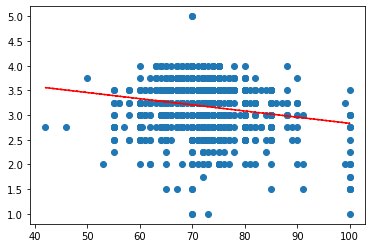

In [140]:
# Make a scatterplot of ratings vs percentage of cocoa
plt.scatter(chocolate_df.CocoaPercentage, chocolate_df.Ratings)

# Draw a line of best-fit over the scatterplot
z = np.polyfit(chocolate_df.CocoaPercentage, chocolate_df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(chocolate_df.CocoaPercentage, line_function(chocolate_df.CocoaPercentage), "r--")

plt.show()